In [333]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

Training_Set = sio.loadmat('Training_Set.mat')
X = Training_Set['X']
y = Training_Set['y']

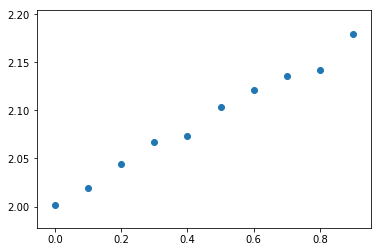

In [334]:
# Plotting the data
plt.scatter(X,y)

In [335]:
# LS estimator using order 1 polynomial
X_new = np.hstack((np.ones((10,1)),X))
theta = np.linalg.inv(X_new.T@X_new)@X_new.T@y
theta

array([[2.00386671],
       [0.18895446]])

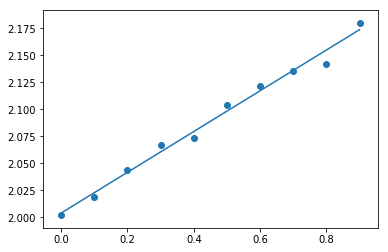

In [336]:
# Plotting the 1st order polynomial
y_pred = theta[0] + theta[1]*X_new[:,1]
plt.plot(X_new[:,1],y_pred)
plt.scatter(X,y)

In [337]:
# LS estimator using order 9 polynomial
X_pol = np.hstack((np.ones((10,1)),X,X**2,X**3,X**4,X**5,X**6,X**7,X**8))
theta = np.linalg.inv(X_pol.T@X_pol)@X_pol.T@y

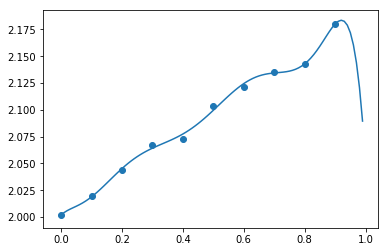

In [338]:
# Plotting the 9th order polynomial curve
X_plot = np.arange(0,1,0.01).reshape(100,1)
X_plot = np.hstack((np.ones((100,1)),X_plot,X_plot**2,X_plot**3,X_plot**4,X_plot**5,X_plot**6,X_plot**7,X_plot**8))
y_pol = X_plot@theta
plt.plot(X_plot[:,1],y_pol)
plt.scatter(X,y)

In [339]:
# Ridge regression for λ=0.1
X_ridge = np.hstack((X,X**2,X**3,X**4,X**5,X**6,X**7,X**8))
clf1 = Ridge(alpha=0.1)
clf1.fit(X_ridge, y) 
y_recon1 = clf1.intercept_ + X_ridge@clf1.coef_.T

# Ridge regression for λ=1
clf2 = Ridge(alpha=1)
clf2.fit(X_ridge, y) 
y_recon2 = clf2.intercept_ + X_ridge@clf2.coef_.T

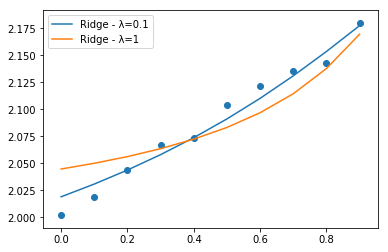

In [340]:
# Plotting ridge regression polynomials for λ=0.1 and λ=1
plt.plot(X,y_recon1,label="Ridge - λ=0.1")
plt.plot(X,y_recon2,label="Ridge - λ=1")
plt.legend()
plt.scatter(X,y)

In [341]:
# Lasso for λ=0.1
X_lasso = np.hstack((X,X**2,X**3,X**4,X**5,X**6,X**7,X**8))
clf3 = Lasso(alpha=0.0001)
clf3.fit(X_lasso, y) 
y_recon3 = clf3.intercept_ + X_ridge@clf3.coef_.T

# Ridge regression for λ=1
clf4 = Lasso(alpha=0.001)
clf4.fit(X_lasso, y) 
y_recon4 = clf4.intercept_ + X_ridge@clf4.coef_.T

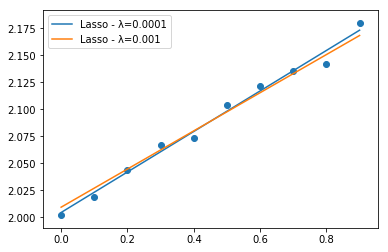

In [342]:
# Plotting ridge regression polynomials for λ=0.1 and λ=1
plt.plot(X,y_recon3,label="Lasso - λ=0.0001")
plt.plot(X,y_recon4,label="Lasso - λ=0.001")
plt.legend()
plt.scatter(X,y)